In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage  # Used skimage as noise functions
from IPython.display import clear_output


<ipython-input-11-fe78b8af34c1>:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = 1
<ipython-input-11-fe78b8af34c1>:20: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output[coords] = 0


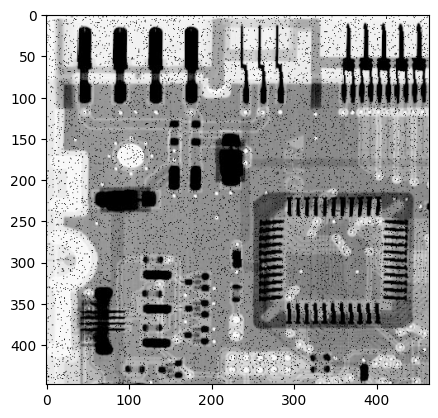

In [11]:
# Adding salt & pepper noise to an image
def salt_pepper(prob,img2):
      # Extract image dimensions
      row, col = img2.shape

      # Declare salt & pepper noise ratio
      s_vs_p = 0.5
      output = np.copy(img2)

      # Apply salt noise on each pixel individually
      num_salt = np.ceil(prob * img2.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
            for i in img2.shape]
      output[coords] = 1

      # Apply pepper noise on each pixel individually
      num_pepper = np.ceil(prob * img2.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
            for i in img2.shape]
      output[coords] = 0

      return output

# Call salt & pepper function with probability = 0.5
# on the grayscale image of rose
out = salt_pepper(0.05,img2)
plt.imshow(out,cmap='gray')

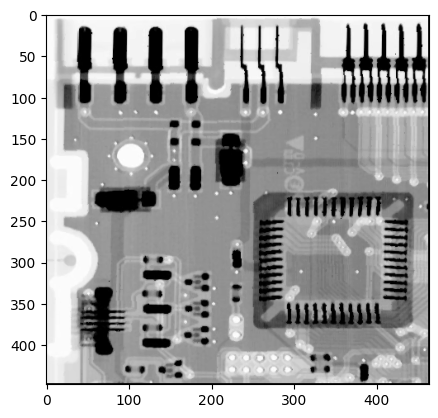

In [12]:
# Median filter
def MedianFilter(image, filter_size):
    # create an empty array with same size as input image
    output = np.zeros(image.shape, np.uint8)

    # create the kernel array of filter as same size as filter_size
    filter_array = [image[0][0]] * filter_size

    # deal with filter size = 3x3
    if filter_size == 9:
        for j in range(1, image.shape[0]-1):
            for i in range(1, image.shape[1]-1):
                filter_array[0] = image[j-1, i-1]
                filter_array[1] = image[j, i-1]
                filter_array[2] = image[j+1, i-1]
                filter_array[3] = image[j-1, i]
                filter_array[4] = image[j, i]
                filter_array[5] = image[j+1, i]
                filter_array[6] = image[j-1, i+1]
                filter_array[7] = image[j, i+1]
                filter_array[8] = image[j+1, i+1]

                # sort the array
                filter_array.sort()

                # put the median number into output array
                output[j][i] = filter_array[4]

    # deal with filter size = 5x5
    elif filter_size == 25:
        for j in range(2, image.shape[0]-2):
            for i in range(2, image.shape[1]-2):
                filter_array[0] = image[j-2, i-2]
                filter_array[1] = image[j-1, i-2]
                filter_array[2] = image[j, i-2]
                filter_array[3] = image[j+1, i-2]
                filter_array[4] = image[j+2, i-2]
                filter_array[5] = image[j-2, i-1]
                filter_array[6] = image[j-1, i-1]
                filter_array[7] = image[j, i-1]
                filter_array[8] = image[j+1, i-1]
                filter_array[9] = image[j+2, i-1]
                filter_array[10] = image[j-2, i]
                filter_array[11] = image[j-1, i]
                filter_array[12] = image[j, i]
                filter_array[13] = image[j+1, i]
                filter_array[14] = image[j+2, i]
                filter_array[15] = image[j-2, i+1]
                filter_array[16] = image[j-1, i+1]
                filter_array[17] = image[j, i+1]
                filter_array[18] = image[j+1, i+1]
                filter_array[19] = image[j+2, i+1]
                filter_array[20] = image[j-2, i+2]
                filter_array[21] = image[j-1, i+2]
                filter_array[22] = image[j, i+2]
                filter_array[23] = image[j+1, i+2]
                filter_array[24] = image[j+2, i+2]

                # sort the array
                filter_array.sort()

                # put the median number into output array
                output[j][i] = filter_array[12]
    return output
median_3x3_ = MedianFilter(out, 9)
plt.imshow(median_3x3_,cmap='gray')